In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz2 as fgv

In [2]:
#Define heterodimer

# Rates in terms of interpretable quantities
mean_num_A_monomers = 200.0
mean_num_B_monomers = 100.0  
mean_num_dimers = 100.0
rate1p = mean_num_A_monomers
rate1m = 1.0
rate2p = mean_num_B_monomers
rate2m = 1.0
rate3p = mean_num_dimers/(mean_num_A_monomers*mean_num_B_monomers)
rate3m = 1.0

# Print out rate-determining quantities
print('mean_num_A_monomers = ', mean_num_A_monomers)
print('mean_num_B_monomers = ', mean_num_B_monomers)
print('mean_num_dimers = ', mean_num_dimers)

# Create fields
A = fg.Field(name='A', index_dim=1)
B = fg.Field(name='B', index_dim=1)
a = fg.Field(name='a', index_dim=1)
b = fg.Field(name='b', index_dim=1)
J = fg.Field(name='J', index_dim=2)

# Create rules 
R_1p = fg.MonomerCreationRule(name='R_1p', rate=rate1p, particle=A, sites=[a])
R_1m = fg.MonomerAnnihilationRule(name='R_1m', rate=rate1m, particle=A, sites=[a])
R_2p = fg.MonomerCreationRule(name='R_2p', rate=rate2p, particle=B, sites=[b])
R_2m = fg.MonomerAnnihilationRule(name='R_2m', rate=rate2m, particle=B, sites=[b])
R_3p = fg.HeterotypicInteractionCreationRule(name='R_3p', rate=rate3p, A=A, B=B, a=a, b=b, J=J)
R_3m = fg.HeterotypicInteractionAnnihilationRule(name='R_3m', rate=rate3m, A=A, B=B, a=a, b=b, J=J)       

# Define fock space and rules
space = fg.FockSpace(fields=[A, B, a, b, J])
rules = fg.RuleSet(rules=[R_1p, R_1m, R_2p, R_2m, R_3p, R_3m])

mean_num_A_monomers =  200.0
mean_num_B_monomers =  100.0
mean_num_dimers =  100.0


Progress:   0%|          | 0/30000 [00:00<?, ?it/s]

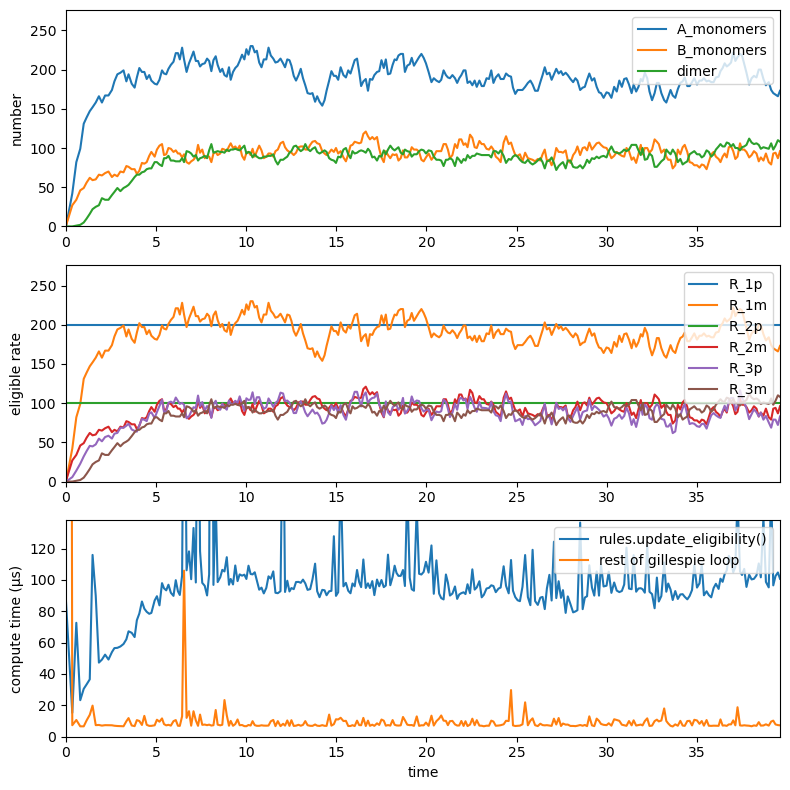

In [4]:
def summary_stats_func():
    stats_dict = dict(
        A_monomers=len(A.indices) - len(a.indices),
        B_monomers=len(B.indices) - len(b.indices),
        dimer=len(J.indices),
    )
    return stats_dict

# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=100)

# Show simulation stats
fgv.show_sim_stats(sim, x_is_time=True)